# **Real Estate Using Machine Learning with Linear Regression Model, Random Forest, XGBoost**

## **Step 1: import Libraries and Load Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("Real estate.csv")

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.shape

(414, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## **Step 2: Prepare Dataset**

In [7]:
df.set_index("No",inplace=True)

In [8]:
df["X1 transaction date"] = df["X1 transaction date"].astype(int)

In [9]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
df.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

## **Step 3: Separate Input and Output**

In [12]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [13]:
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

## **Step 4: Train Test Split**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.20)

## **Step 5: Model Selection and Training**

In [19]:
# Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=0),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=0)
}

# Train models and store predictions
model_predictions = {}
trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_predictions[name] = y_pred  # ← Store prediction
    trained_models[name] = model      # ← Store model for later use

     # Show results
    print(f"\n{name} Evaluation on Test Data:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))


Linear Regression Evaluation on Test Data:
MAE: 5.669976596012609
MSE: 58.84120993795536
RMSE: 7.670802431164249
R2 Score: 0.6612461467161889

Random Forest Evaluation on Test Data:
MAE: 5.146252208835341
MSE: 53.17035752910002
RMSE: 7.291800705525352
R2 Score: 0.6938937266508832

XGBoost Evaluation on Test Data:
MAE: 5.808900518302458
MSE: 79.91324388702787
RMSE: 8.939420780287048
R2 Score: 0.5399326539395711


## **Step 6: Predictions  Predictions (Store Separately for All Models)**

In [20]:
# Store predictions separately for later use
y_pred_lr = model_predictions["Linear Regression"]
y_pred_rf = model_predictions["Random Forest"]
y_pred_xgb = model_predictions["XGBoost"]

## **Step 7: Model Evaluation Comparison (Bar Graph)**

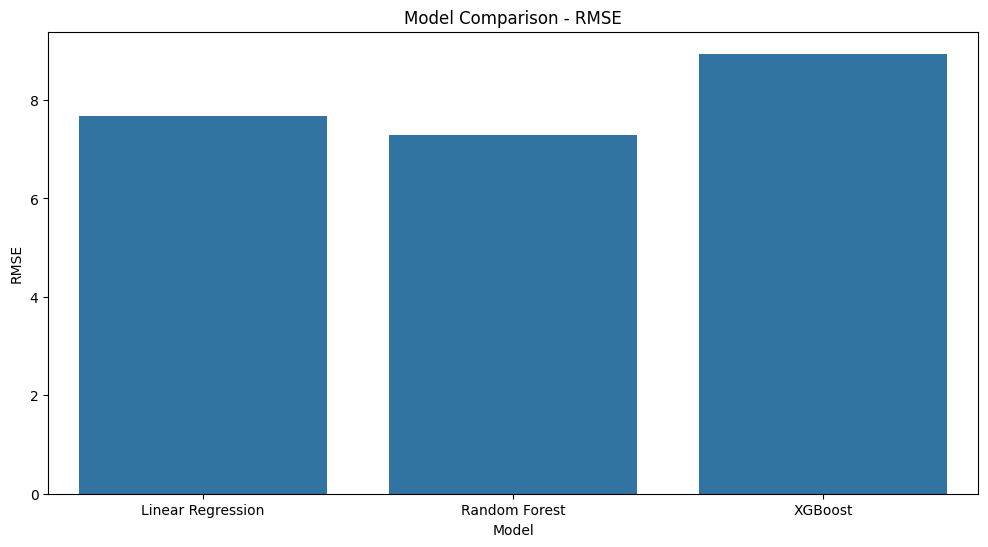

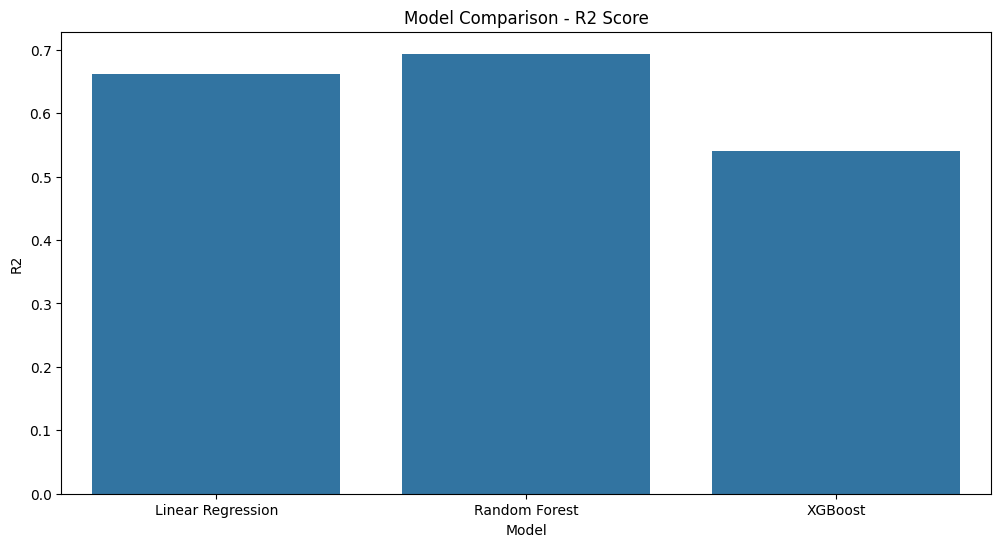

In [22]:
# Evaluation metrics for visualization
results = {
    "Model": [],
    "MAE": [],
    "RMSE": [],
    "R2": []
}

for name in models:
    mae = mean_absolute_error(y_test, model_predictions[name])
    rmse = np.sqrt(mean_squared_error(y_test, model_predictions[name]))
    r2 = r2_score(y_test, model_predictions[name])

    results["Model"].append(name)
    results["MAE"].append(mae)
    results["RMSE"].append(rmse)
    results["R2"].append(r2)

results_df = pd.DataFrame(results)

# Plot comparison
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="RMSE", data=results_df)
plt.title("Model Comparison - RMSE")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="R2", data=results_df)
plt.title("Model Comparison - R2 Score")
plt.show()

## **Step 8: Residual Plot for Best Model**

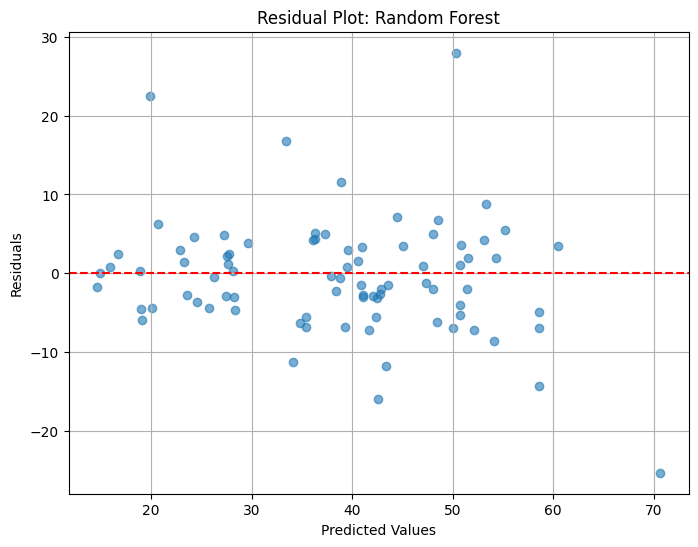

In [23]:
# Choose best model (lowest RMSE)
best_model_name = results_df.sort_values("RMSE").iloc[0]["Model"]
best_model = trained_models[best_model_name]
best_pred = model_predictions[best_model_name]

residuals = y_test - best_pred

plt.figure(figsize=(8,6))
plt.scatter(best_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title(f"Residual Plot: {best_model_name}")
plt.grid(True)
plt.show()


## **Step 9: Actual vs Predicted Plot for Best Model**

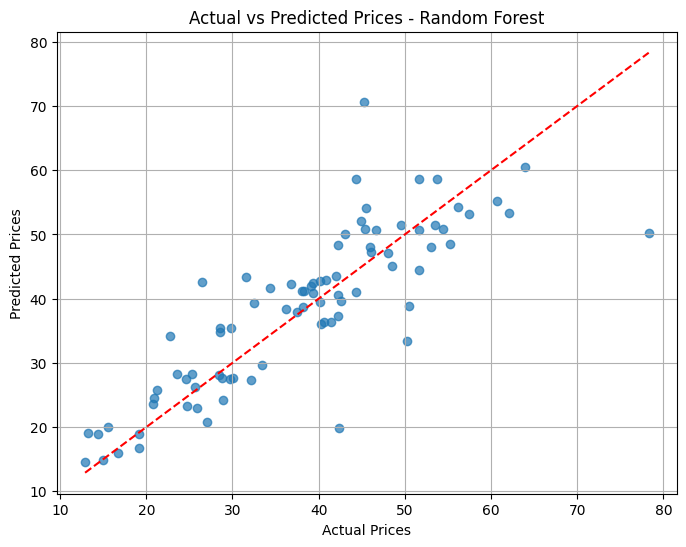

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, best_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"Actual vs Predicted Prices - {best_model_name}")
plt.grid(True)
plt.show()


## **Step 10: Target Variable Distribution**

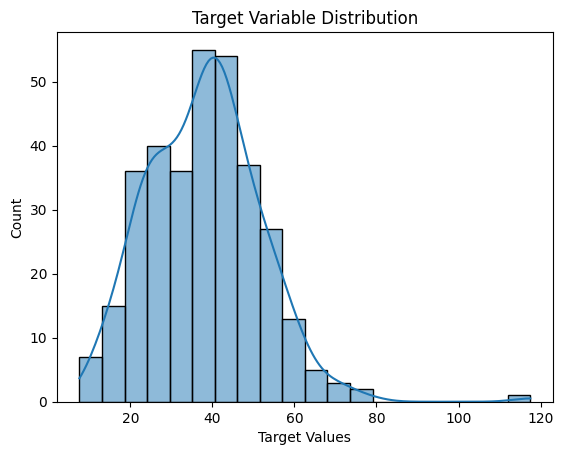

In [25]:
sns.histplot(y_train, kde=True)
plt.title("Target Variable Distribution")
plt.xlabel("Target Values")
plt.ylabel("Count")
plt.show()